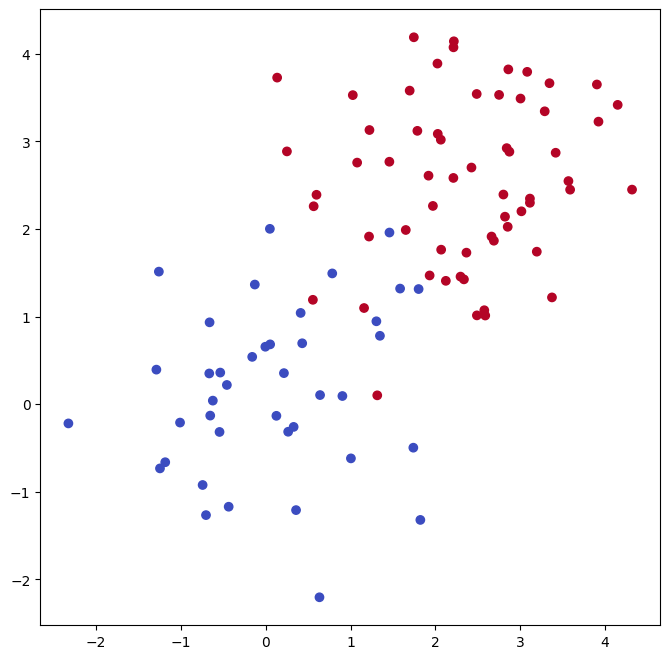

In [61]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
X = rng.standard_normal((100, 2))
y = np.array([-1]*40+[1]*60)
X[y==1] += 2.5
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=plt.cm.coolwarm);

In [62]:
from sklearn.svm import SVC
import sklearn.model_selection as skm
from sklearn.metrics import accuracy_score

svm_linear = SVC(kernel='linear')

kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':np.linspace(0.001, 10, 100)},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
params = grid.best_params_

best_svm = grid.best_estimator_
cv_error = 1 - np.mean(skm.cross_val_score(best_svm, X, y, cv=5))

y_pred_train = best_svm.predict(X)
train_error = 1 - accuracy_score(y, y_pred_train)


print("Optimal params:", params)
print("CV error:", cv_error)
print("Training error:", train_error)

Optimal params: {'C': np.float64(0.10200000000000001)}
CV error: 0.06999999999999995
Training error: 0.06999999999999995


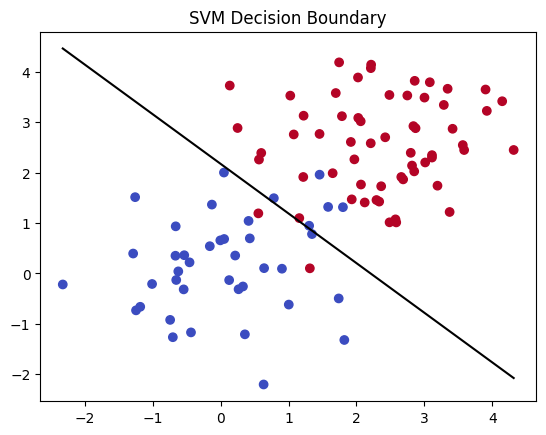

In [63]:
w = best_svm.coef_[0]
b = best_svm.intercept_[0]

x_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_plot = -(w[0]*x_plot + b)/w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_plot, y_plot, 'k-')
plt.title('SVM Decision Boundary')
plt.show()

In [64]:
svm_r = SVC(kernel='rbf')

kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_r,
                        {'gamma':np.linspace(0.001, 10, 50),
                         'C':np.linspace(0.001, 10, 50)},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
params = grid.best_params_

best_r = grid.best_estimator_
cv_error = 1 - np.mean(skm.cross_val_score(best_r, X, y, cv=5))

y_pred_train = best_r.predict(X)
train_error = 1 - accuracy_score(y, y_pred_train)


print("Optimal params:", params)
print("CV error:", cv_error)
print("Training error:", train_error)

Optimal params: {'C': np.float64(2.653795918367347), 'gamma': np.float64(1.0213061224489797)}
CV error: 0.06999999999999995
Training error: 0.050000000000000044


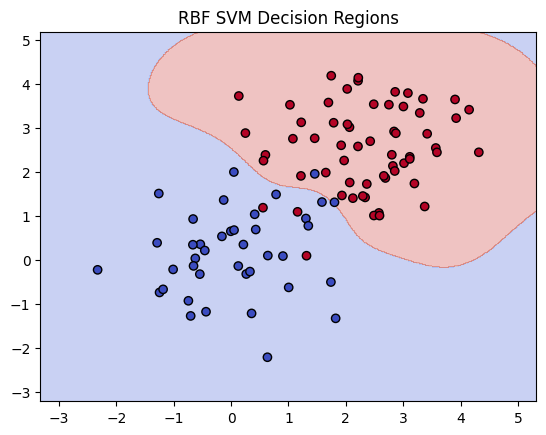

In [65]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = best_r.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('RBF SVM Decision Regions')
plt.show()


In [66]:
svm_p = SVC(kernel='poly')

kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_p,
                        {'degree': range(1, 11)},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
params = grid.best_params_

best_p = grid.best_estimator_
cv_error = 1 - np.mean(skm.cross_val_score(svm_p, X, y, cv=5))

y_pred_train = best_p.predict(X)
train_error = 1 - accuracy_score(y, y_pred_train)

print("Optimal params:", params)
print("CV error:", cv_error)
print("Training error:", train_error)

Optimal params: {'degree': 2}
CV error: 0.050000000000000044
Training error: 0.06000000000000005


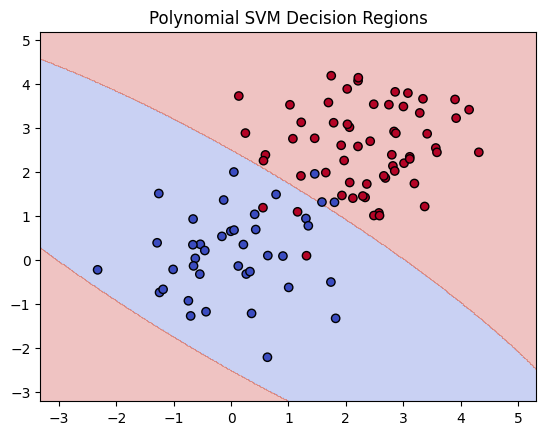

In [67]:
Z = best_p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Polynomial SVM Decision Regions')
plt.show()

Across the three SVM variants, we see slightly different trade-offs between training and cross-validation errors. The **linear SVM** (with tuned **C**) achieves about **7% error** on both training and CV sets, which suggests it fits the data reasonably well without overfitting. The **polynomial SVM** (degree 2) performs the best overall, with the lowest **CV error (\~5%)** while keeping the training error close (\~6%), indicating a good balance between model complexity and generalization. The **RBF SVM** achieves the lowest training error (\~5%), but its CV error is higher (\~7%), which suggests it may be slightly overfitting to the training set. Overall, the polynomial kernel with degree 2 appears to capture the structure of your data most effectively, providing the best generalization performance among the three.